In [83]:
get_ipython().run_line_magic('matplotlib','notebook')
# get_ipython().run_line_magic('matplotlib','inline')
get_ipython().run_line_magic('load_ext','autoreload')
get_ipython().run_line_magic('autoreload','2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
# from dask.distributed import Client
# from dask.diagnostics import ProgressBar
# import dask

# n_workers=36
# tot_mem  = 100 # GB
# print(' --> memory_limit: {:3.3f} GB'.format(tot_mem/(n_workers+1)))
# dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
# client = Client(n_workers=n_workers, threads_per_worker=1, memory_limit='{:3.3f} GB'.format(tot_mem/n_workers))
# client

In [85]:
# Parameters
mesh_path = '/albedo/work/user/pscholz/mesh_fesom2.0/channel_soufflet_lev41/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= None #5 # set None --> take path as in input_paths otherwise add dir of cycle
which_mode= 'hslice'

#_____________________________________________________________________________________
input_paths= list()
# input_paths.append('/albedo/home/pscholz/results/test_channel_ctrl_01/1/')
input_paths.append('/albedo/home/pscholz/results/test_channel_spltexpl_BTstep30_BTtheta0.14/1/')

input_names= list()
input_names.append('ssh channel')

year      = [1958, 1967]
mon, day, record, box, depth = None, None, -1, None, 1000
box = None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/' # None #
ref_name  = None #'TKE, ck=0.1' # None
ref_year  = None #[1979, 2019]
ref_mon, ref_day, ref_record = None, None, None
ref_cstr, ref_cnum = 'wbgyr', 20
ref_cref, ref_crange, ref_cmin, ref_cmax, ref_cfac, ref_climit = None, None, None, None, None, None
ref_chist, ref_ctresh = True, 0.995
ref_rescale = None

#_____________________________________________________________________________________
do_clim   = False
which_clim= 'phc3'
clim_path = '/albedo/work/projects/p_fesom/FROM-OLLIE/FESOM2/hydrography/phc3.0/phc3.0_annual.nc'

#_____________________________________________________________________________________
cstr, cnum = 'blue2red', 20
cref, crange, cmin, cmax, cfac, climit = None, None, None, None, None, None
chist, ctresh = False, 0.995

#_____________________________________________________________________________________
ncolumn   = 2 
do_rescale= None #'log10'
which_dpi = 300
proj      = 'channel'
do_plot   = 'tcf'
do_reffig = True
figfac    = [10, 5.5] #ä[7, 3.5]

In [86]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, cyclic=4.5, do_info=True, do_pickle=False, 
                          do_loadraw=False, do_lsmask=False)

#______________________________________________________________________________________________________
if (which_cycl != None) and (which_cycl != "None"): 
    for ii,ipath in enumerate(input_paths):
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, input_paths[ii])
    
    if (ref_path != None) and (ref_path != "None"): 
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)
        
#______________________________________________________________________________________________________
cinfo=tpv.set_cinfo(cstr, cnum, crange, cmin, cmax, cref, cfac, climit, chist, ctresh)
ref_cinfo=None
if (ref_path != None) and (ref_path != "None"): 
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record
    cinfo['cref']=0.0 
    ref_cinfo=tpv.set_cinfo(ref_cstr, ref_cnum, ref_crange, ref_cmin, ref_cmax, ref_cref, ref_cfac, ref_climit, ref_chist, ref_ctresh)
else:
    do_reffig=False
    
#______________________________________________________________________________________________________    
# concatenate list = list1+list2
if (ref_path != None) and (ref_path != "None"): 
    if isinstance(ref_path, list): 
        input_paths, input_names = ref_path + input_paths, ref_name + input_names
    else:    
        input_paths, input_names = list([ref_path]) + input_paths, list([ref_name]) + input_names

 > load mesh from *.out files: /albedo/work/user/pscholz/mesh_fesom2.0/channel_soufflet_lev41
 > comp e_area
 > comp n_area
___FESOM2 MESH INFO________________________
 > path            = /albedo/work/user/pscholz/mesh_fesom2.0/channel_soufflet_lev41
 > id              = channel_soufflet_lev41
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = False
 > do earea,eresol = True, False
 > do narea,nresol = True, False
___________________________________________
 > #node           = 2875
 > #elem           = 5700
 > #lvls           = 41
___________________________________________


0 /albedo/home/pscholz/results/test_channel_spltexpl_BTstep30_BTtheta0.14/1/ ssh channel
[0.0, 4.5, 0.0, 17.9049]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


<IPython.core.display.Javascript object>


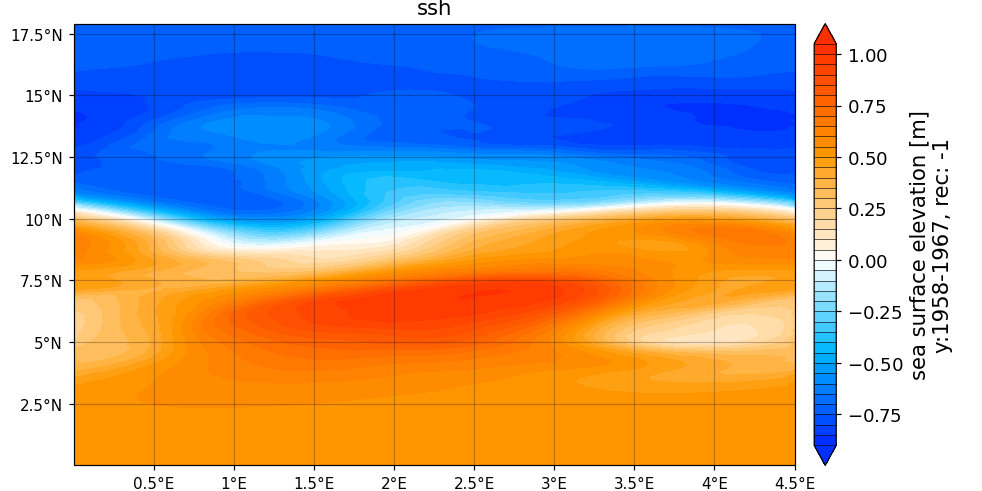

cmin, cmax =  -0.87003493309021 1.002104640007019
{'cstr': 'blue2red', 'cnum': 20, 'chist': False, 'ctresh': 0.995, 'cref': 0, 'cmin': -0.87, 'cmax': 1.0021, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f74e44647c0>, 'clevel': array([-0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 ,
       -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,
        0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05])}


In [87]:
vname     = 'ssh'
data_list = list()
#___LOAD FESOM2 DATA___________________________________________________________________________________
for ii, (datapath, descript) in enumerate(zip(input_paths, input_names)):
    print(ii, datapath, descript)
    data = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, day=day, record=record, 
                                depth=depth, descript=vname, do_info=False, do_file='run') 
    #__________________________________________________________________________________________________    
    data_list.append(data)  
    del(data)

#___PLOT FESOM2 DATA___________________________________________________________________________________
cinfo['cref'] = 0
fig, ax, cbar = tpv.plot_hslice(mesh, data_list, cinfo=cinfo, box=box, proj=proj, do_grid=False, 
                                title='descript', do_lsmask=None)

0 /albedo/home/pscholz/results/test_channel_spltexpl_BTstep30_BTtheta0.14/1/ ssh channel
[0.0, 4.5, 0.0, 17.9049]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


<IPython.core.display.Javascript object>


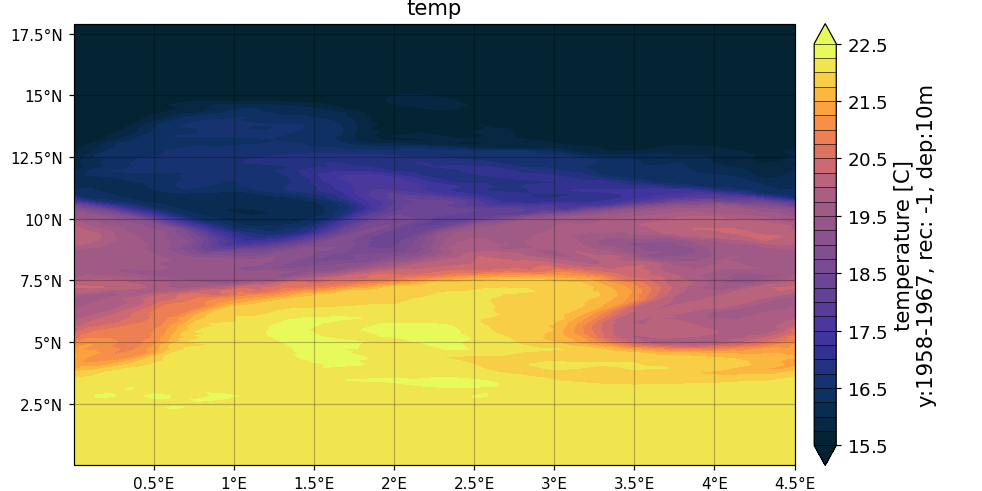

--> histo: cmin, cmax =  15.52562237686351 22.287886100749596
{'cstr': 'cmocean.thermal', 'chist': True, 'ctresh': 0.995, 'cmin': 15.53, 'cmax': 22.29, 'cref': 20.0, 'cnum': 20, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f74e436db20>, 'clevel': array([15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 ,
       17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75,
       20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
       22.25, 22.5 ])}


In [88]:
vname     = 'temp'
data_list = list()
#___LOAD FESOM2 DATA___________________________________________________________________________________
for ii, (datapath, descript) in enumerate(zip(input_paths, input_names)):
    print(ii, datapath, descript)
    data = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, day=day, record=record, 
                                depth=10, descript=vname, do_info=False, do_file='run') 
    #__________________________________________________________________________________________________    
    data_list.append(data)  
    del(data)

#___PLOT FESOM2 DATA___________________________________________________________________________________
cinfo['cref'] = 0
fig, ax, cbar = tpv.plot_hslice(mesh, data_list, cinfo=dict({'cstr':'cmocean.thermal'}), 
                                box=box,  proj=proj, do_grid=False, title='descript', do_lsmask=None)

## Make Channel movie:
save each frame as *.png than ...

ffmpeg -pattern_type glob -r 1 -i 'frame_*.png' -c:v libx264 -pix_fmt yuv420p -vf scale=1440:992 movie.mp4  <br>
ffmpeg -i movie.mp4 -r 6 -filter:v "setpts=PTS/6" movie_x6.mp4<br>
ffmpeg -stream_loop 5 -i movie_x6.mp4 -c copy movie_x6_loop5.mp4


[0.0, 4.5, 0.0, 17.9049]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


<IPython.core.display.Javascript object>


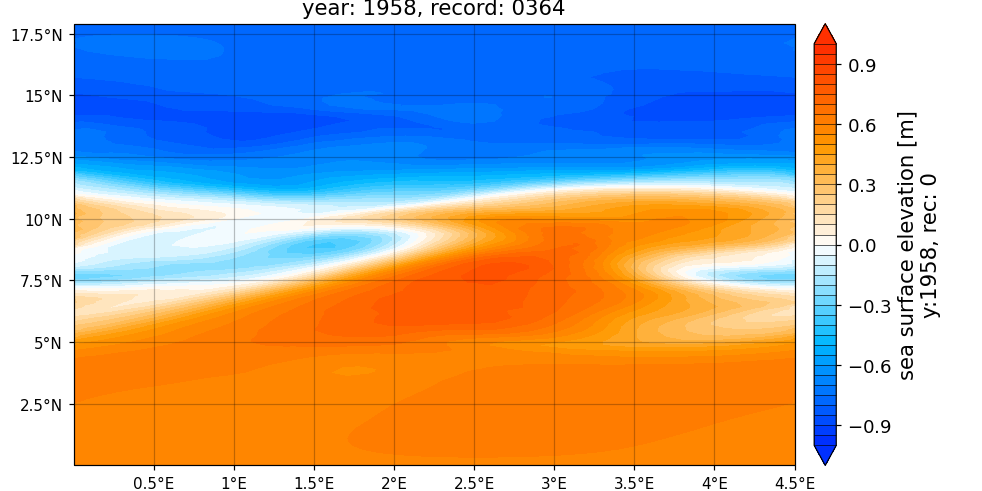

{'cstr': 'blue2red', 'crange': [-1.0, 1.0, 0], 'cnum': 40, 'chist': True, 'ctresh': 0.995, 'cmin': -1.0, 'cmax': 1.0, 'cref': 0, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f74e7d95520>, 'clevel': array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ])}


In [90]:
import matplotlib.pyplot        as plt
import time
vname     = 'ssh'
data_list = list()
year      = [1958, 1958]
record    = [0, 365]#[0, 221]
save_path = '/albedo/home/pscholz/tripyview/Results/check_channel/movie/'
cnt = 0
do_plot   = 'tcf'
#___LOAD FESOM2 DATA___________________________________________________________________________________
for yeari in range(year[0], year[1]+1):
    for reci in range(record[0], record[1]):
        data = tpv.load_data_fesom2(mesh, input_paths[0], vname=vname, year=yeari, mon=mon, day=day, record=reci, 
                                    depth=None, descript=vname, do_info=False) 

        #___PLOT FESOM2 DATA___________________________________________________________________________________
        cinfo = dict({'cstr':'blue2red', 'crange':[-1.00, 1.00, 0], 'cnum':40})
        spath  = os.path.join(save_path,'{}_{:04d}_{:04d}.png'.format('frame', yeari, reci))
        
        if cnt==0 :
            fig, ax, cbar, hpall, tri, e_idxok, cinfout = tpv.plot_hslice(mesh, [data], cinfo=cinfo, proj=proj, box=box, do_grid=False, do_plot=do_plot, 
                                                                 title='year: {:4d}, record: {:04d}'.format(yeari, reci),
                                                                 do_save=None, save_dpi=300, do_lsmask=None, 
                                                                 nargout=['fig', 'ax', 'cbar', 'hpall', 'tri', 'e_idxok', 'cinfo'])
            tpv.do_savefigure(spath, fig, dpi=300, transparent=True, do_info=False)    
            
        else:
            data_plot = data['ssh'].values.copy()
            data_plot = np.hstack((data_plot,data_plot[mesh.n_pbnd_a]))
            hpall[0].remove()
            hpall = []
            if do_plot=='tcp':
                hp=ax[ii].tripcolor(tri.x, tri.y, tri.triangles[e_idxok,:], data_plot,
                                        shading='flat', cmap=cinfout['cmap'],
                                        vmin=cinfout['clevel'][0], vmax=cinfout['clevel'][ -1],)
            elif do_plot=='tcf': 
                hp=ax[ii].tricontourf(tri.x, tri.y, tri.triangles[e_idxok,:], data_plot,
                                  levels=cinfout['clevel'], cmap=cinfout['cmap'], extend='both',)
            
            hpall.append(hp)
                                
            ax[0].set_title('year: {:4d}, record: {:04d}'.format(yeari, reci), fontsize=14)
            fig.canvas.draw()
            fig.canvas.flush_events()
            tpv.do_savefigure(spath, fig, dpi=300, transparent=True, do_info=False) 
            
        cnt = cnt+1